In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV, TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge


In [2]:
set1 = pd.read_csv('../Data/SET_main.csv')
macro = pd.read_csv('../Data/macro_data.csv')

In [3]:
macro= macro.set_index('Date')
set1 = set1.set_index('Date')

In [4]:
set1 = set1.drop(columns= {'TLI.BK'})

In [5]:
# Loop through each unique ticker (stock) in the DataFrame
indicator = pd.DataFrame()
for ticker in set1.columns:
    # Calculate SMAs 
    indicator[f'{ticker}_SMA3'] = set1[ticker].rolling(window=3).mean()
    indicator[f'{ticker}_SMA20'] = set1[ticker].rolling(window=20).mean()
    indicator[f'{ticker}_SMA50'] = set1[ticker].rolling(window=50).mean()
    indicator[f'{ticker}_SMA100'] = set1[ticker].rolling(window=100).mean()
    indicator[f'{ticker}_SMA200'] = set1[ticker].rolling(window=200).mean()
    
    # Calculate EMA
    indicator[f'{ticker}_EMA3'] = set1[ticker].ewm(span=3, adjust=False).mean()
    indicator[f'{ticker}_EMA12'] = set1[ticker].ewm(span=12, adjust=False).mean()
    indicator[f'{ticker}_EMA26'] = set1[ticker].ewm(span=26, adjust=False).mean()
    
    # Calculate MACD
    indicator[f'{ticker}_MACD'] = indicator[f'{ticker}_EMA12'] - indicator[f'{ticker}_EMA26']
    
    # Calculate Signal line (9-day EMA of the MACD)
    indicator[f'{ticker}_signal'] = indicator[f'{ticker}_MACD'].ewm(span=9, adjust=False).mean()
    
    # Concatenate each ticker's results into the final indicator DataFrame
    indicator = pd.concat([indicator, set1], axis=1)

In [6]:
indicator = indicator.dropna()

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Merge all the files that have X-variable (features)
features_df = pd.merge(macro, indicator, on='Date', how='outer')
features_df = features_df.fillna(method='ffill').dropna()

In [8]:
# drop the same column names
features_df = features_df.loc[:, ~features_df.columns.duplicated()]

In [9]:
# Make the rows number the same with target and features files
# set the index to the format Datetime
set1.index = pd.to_datetime(set1.index)
features_df.index = pd.to_datetime(features_df.index)

# Align the two DataFrames by finding the intersection of their indices
common_index = set1.index.intersection(features_df.index)

# Reindex both DataFrames to the common index
set1 = set1.loc[common_index]
features_df = features_df.loc[common_index]

In [10]:
features_df.shape, set1.shape

((2463, 213), (2463, 19))

In [11]:
# define X and y
X = features_df 
y = set1 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Training set shape for ADVANC.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for ADVANC.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for ADVANC.BK: {'alpha': 0.01}
Performance for ADVANC.BK - RMSE: 0.00021608497144069615


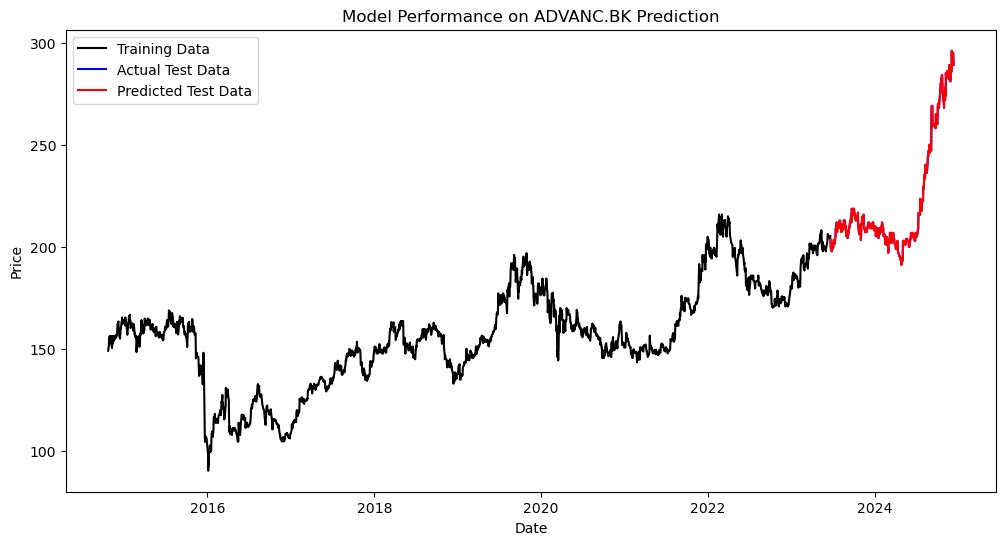

Training set shape for AOT.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for AOT.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for AOT.BK: {'alpha': 0.01}
Performance for AOT.BK - RMSE: 0.00019083301408283479


<Figure size 640x480 with 0 Axes>

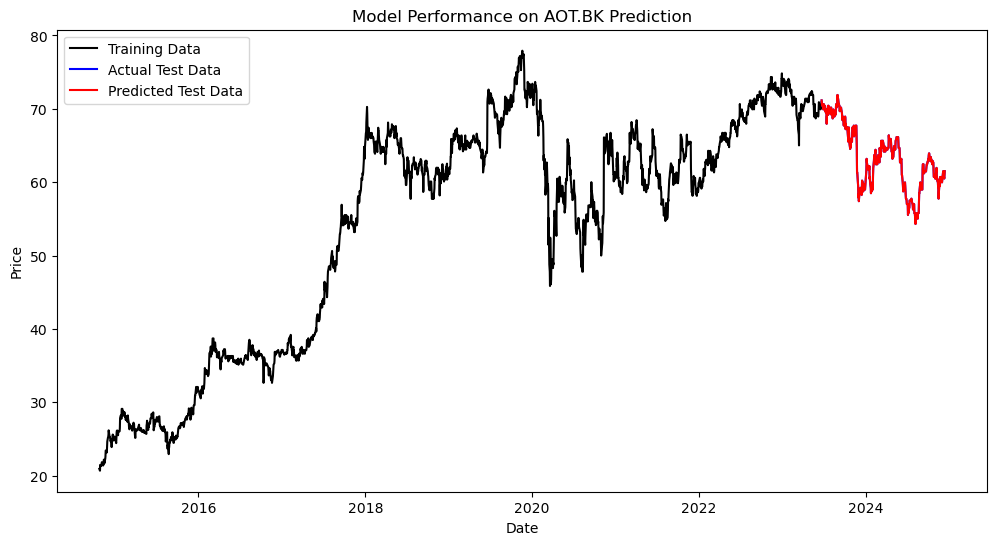

Training set shape for BBL.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for BBL.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BBL.BK: {'alpha': 0.01}
Performance for BBL.BK - RMSE: 7.869319339566007e-05


<Figure size 640x480 with 0 Axes>

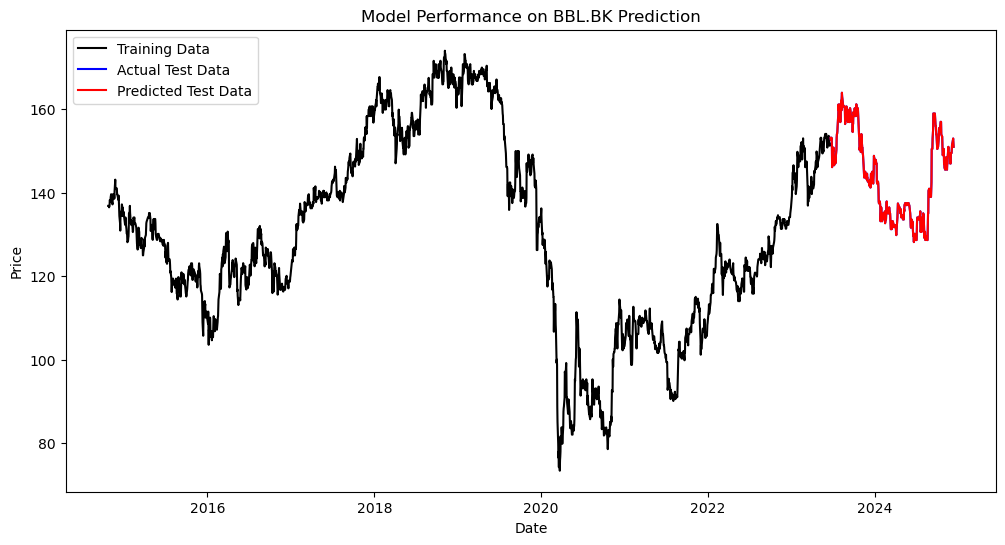

Training set shape for BDMS.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for BDMS.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BDMS.BK: {'alpha': 0.01}
Performance for BDMS.BK - RMSE: 0.0002163095166028272


<Figure size 640x480 with 0 Axes>

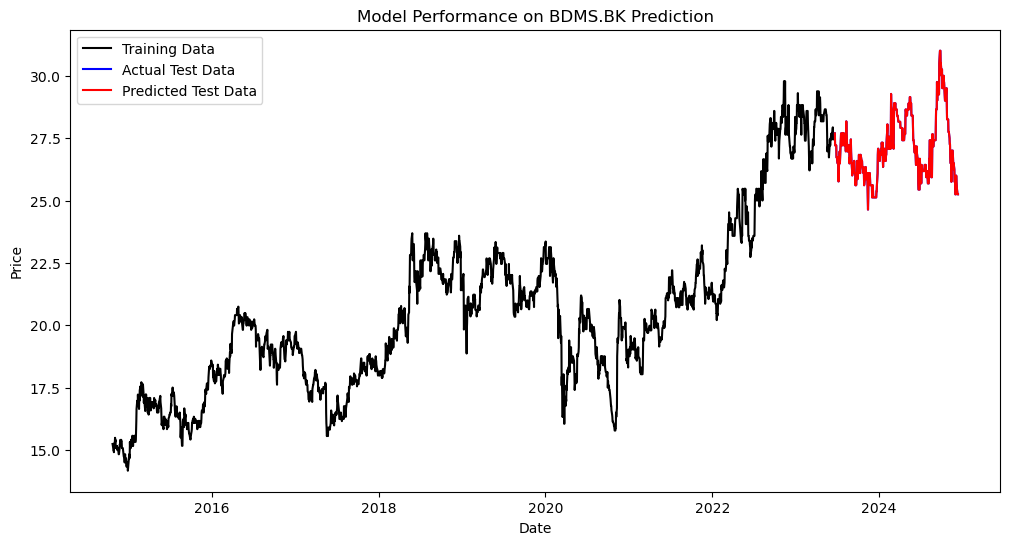

Training set shape for BH.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for BH.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BH.BK: {'alpha': 0.01}
Performance for BH.BK - RMSE: 6.242199632531671e-05


<Figure size 640x480 with 0 Axes>

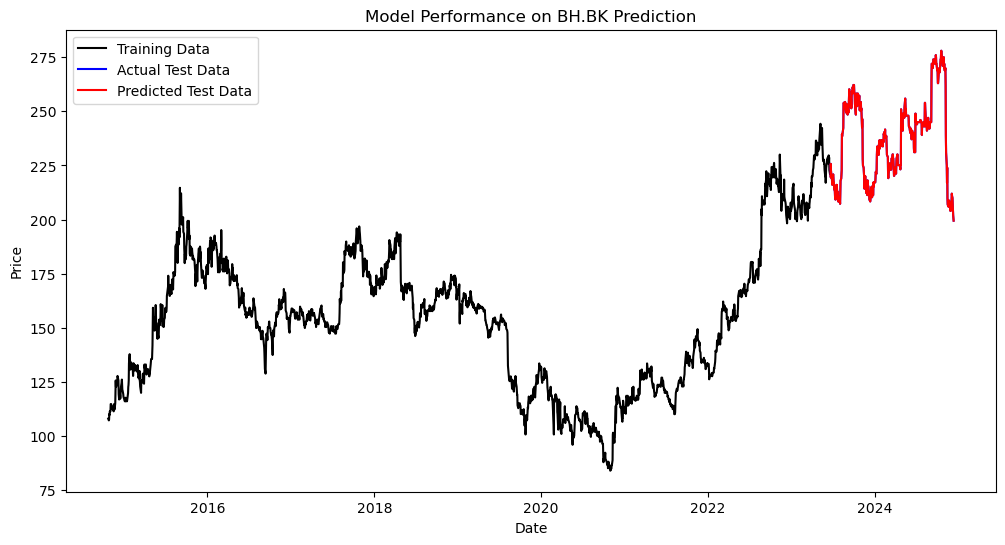

Training set shape for CPALL.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for CPALL.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPALL.BK: {'alpha': 0.01}
Performance for CPALL.BK - RMSE: 0.0005786324004743447


<Figure size 640x480 with 0 Axes>

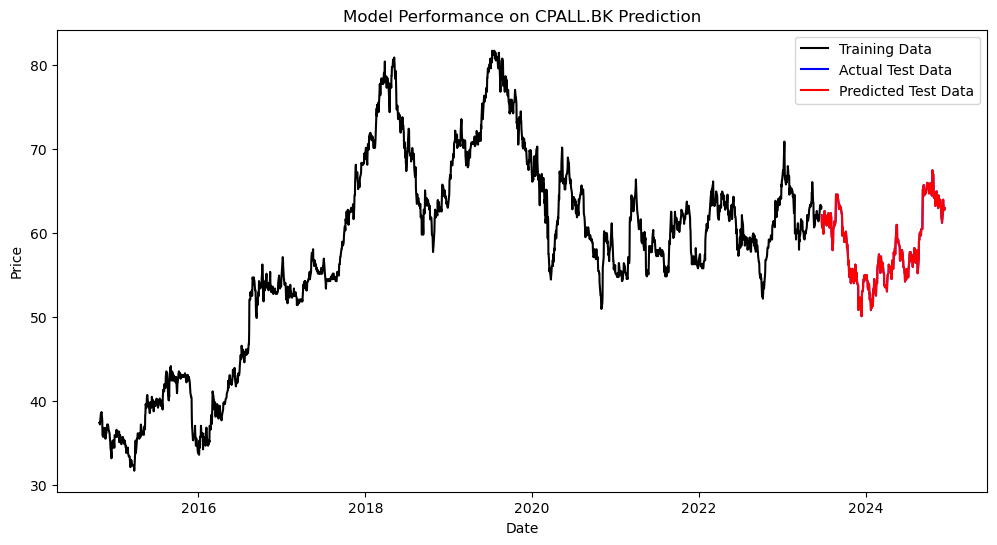

Training set shape for CPF.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for CPF.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPF.BK: {'alpha': 0.01}
Performance for CPF.BK - RMSE: 0.00023992771676595577


<Figure size 640x480 with 0 Axes>

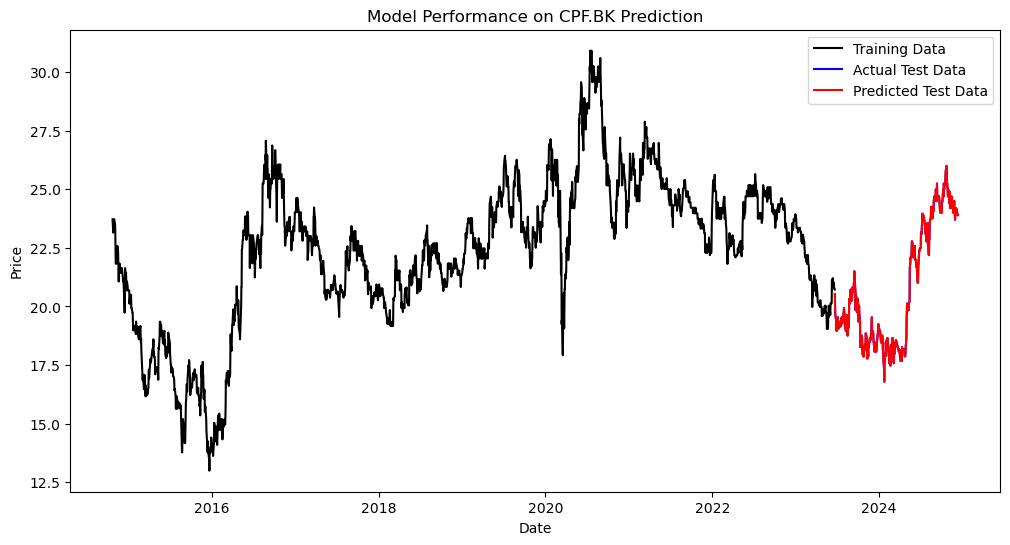

Training set shape for CPN.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for CPN.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPN.BK: {'alpha': 0.01}
Performance for CPN.BK - RMSE: 0.00022441291131314458


<Figure size 640x480 with 0 Axes>

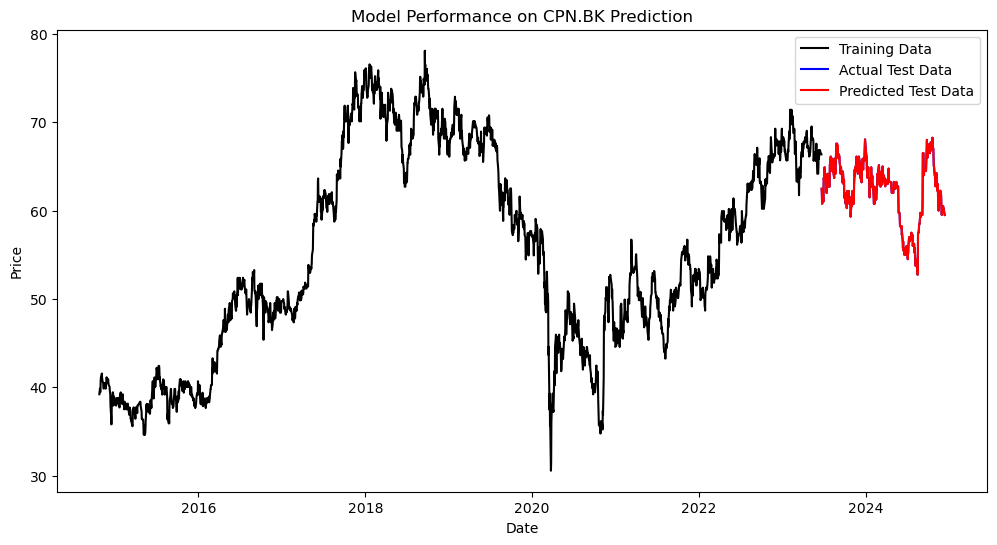

Training set shape for DELTA.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for DELTA.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for DELTA.BK: {'alpha': 0.01}
Performance for DELTA.BK - RMSE: 0.0002379504479271786


<Figure size 640x480 with 0 Axes>

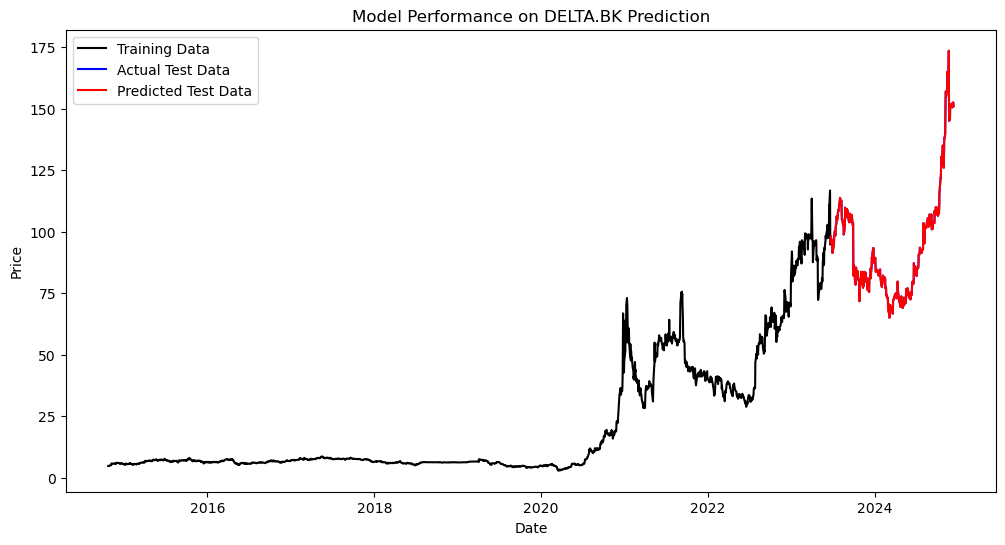

Training set shape for INTUCH.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for INTUCH.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for INTUCH.BK: {'alpha': 0.01}
Performance for INTUCH.BK - RMSE: 0.0005892904115568353


<Figure size 640x480 with 0 Axes>

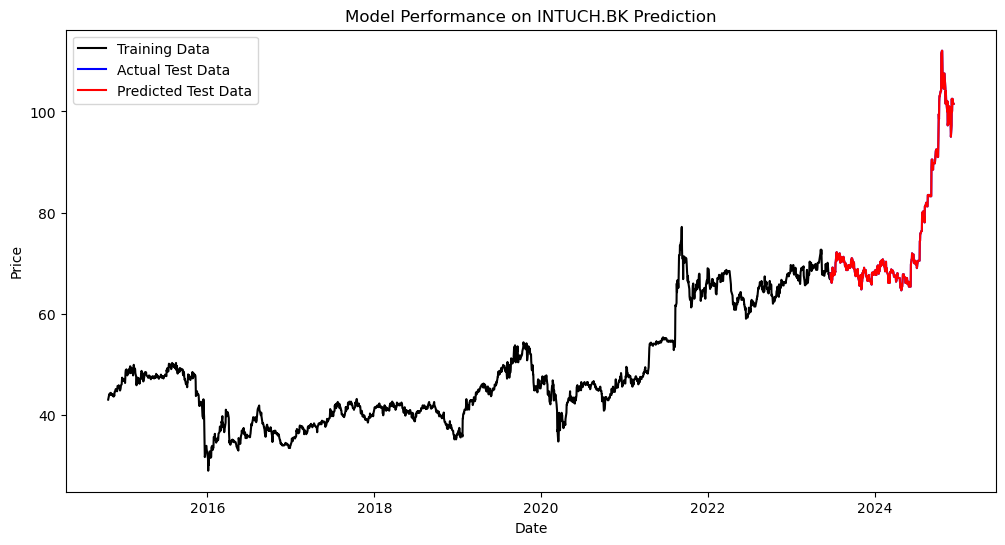

Training set shape for IVL.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for IVL.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for IVL.BK: {'alpha': 0.01}
Performance for IVL.BK - RMSE: 0.00037907595488896807


<Figure size 640x480 with 0 Axes>

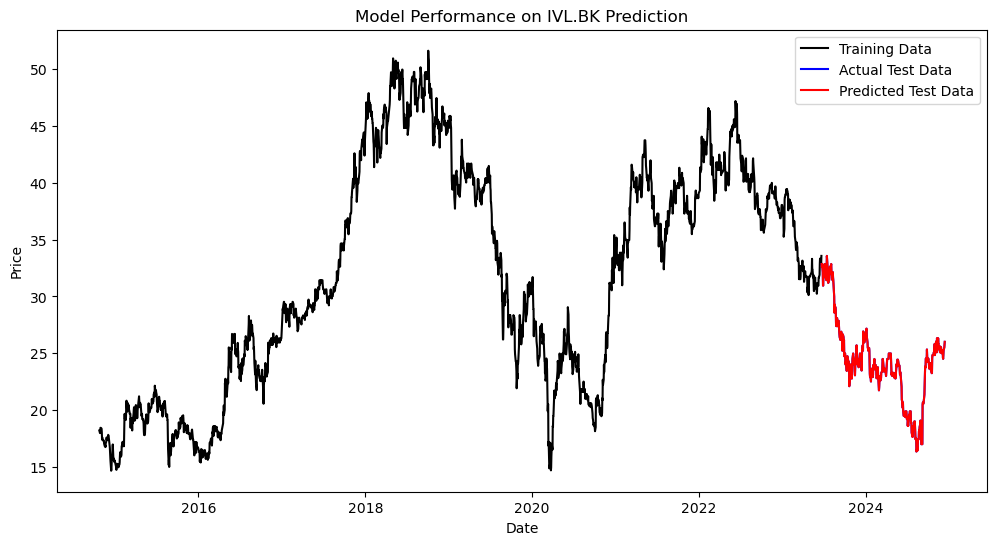

Training set shape for KBANK.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for KBANK.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for KBANK.BK: {'alpha': 0.01}
Performance for KBANK.BK - RMSE: 2.77724863279305e-05


<Figure size 640x480 with 0 Axes>

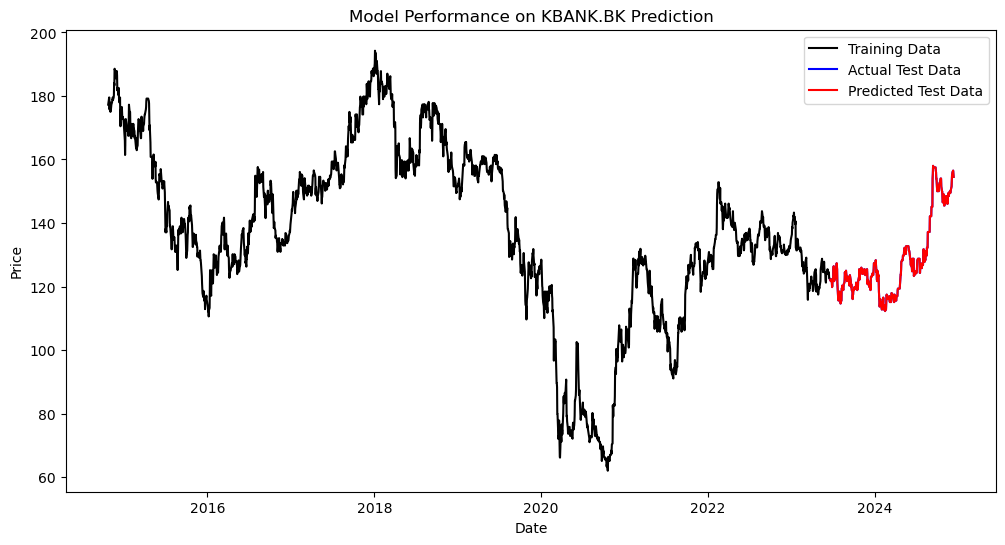

Training set shape for KTB.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for KTB.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for KTB.BK: {'alpha': 0.01}
Performance for KTB.BK - RMSE: 0.0007307047834665192


<Figure size 640x480 with 0 Axes>

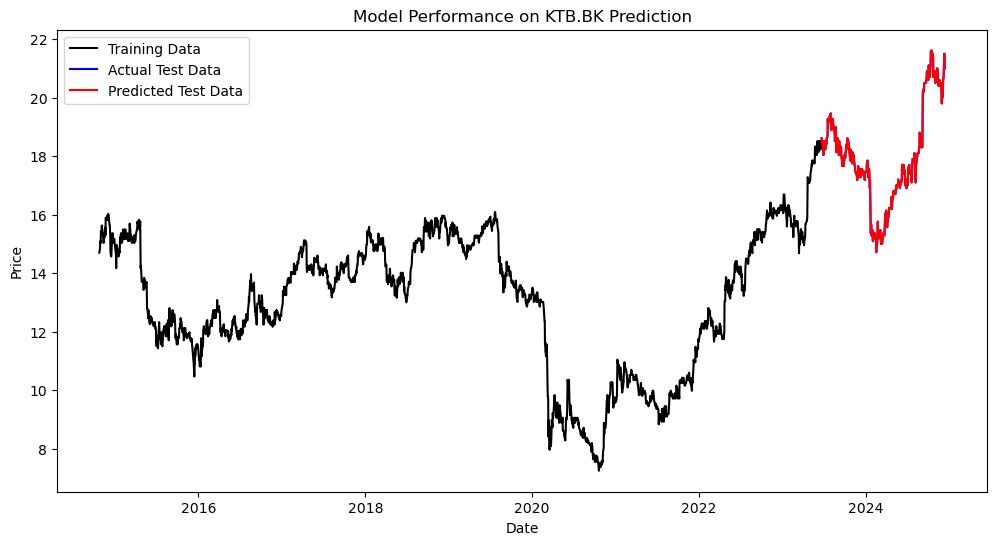

Training set shape for MINT.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for MINT.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for MINT.BK: {'alpha': 0.01}
Performance for MINT.BK - RMSE: 0.00022509791476459172


<Figure size 640x480 with 0 Axes>

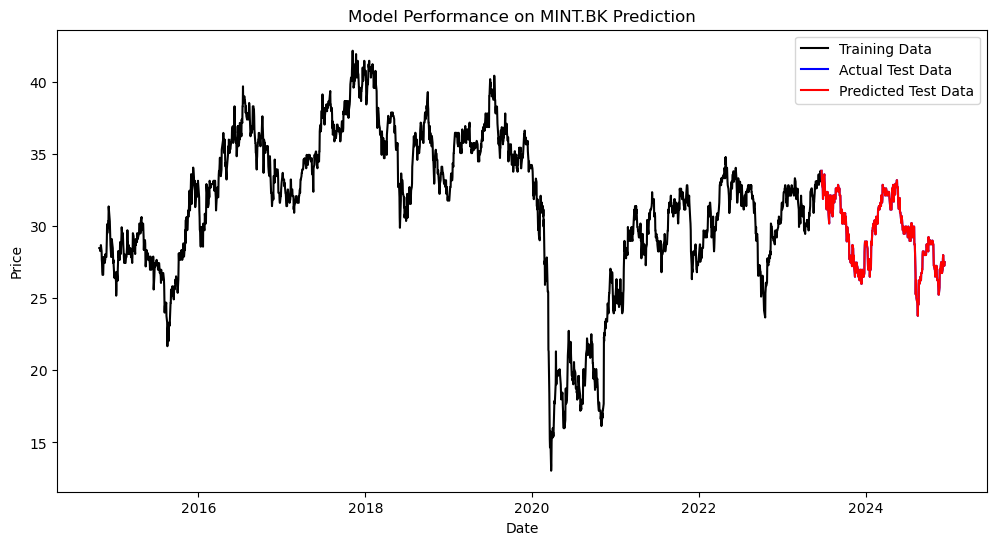

Training set shape for PTT.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for PTT.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for PTT.BK: {'alpha': 0.01}
Performance for PTT.BK - RMSE: 0.00021961427447737933


<Figure size 640x480 with 0 Axes>

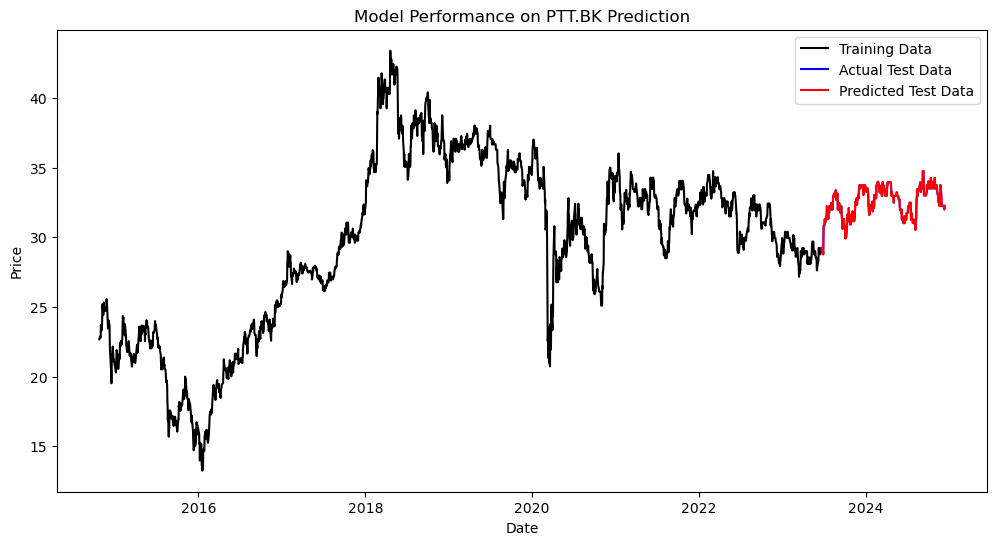

Training set shape for PTTEP.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for PTTEP.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for PTTEP.BK: {'alpha': 0.01}
Performance for PTTEP.BK - RMSE: 0.0001320804898300049


<Figure size 640x480 with 0 Axes>

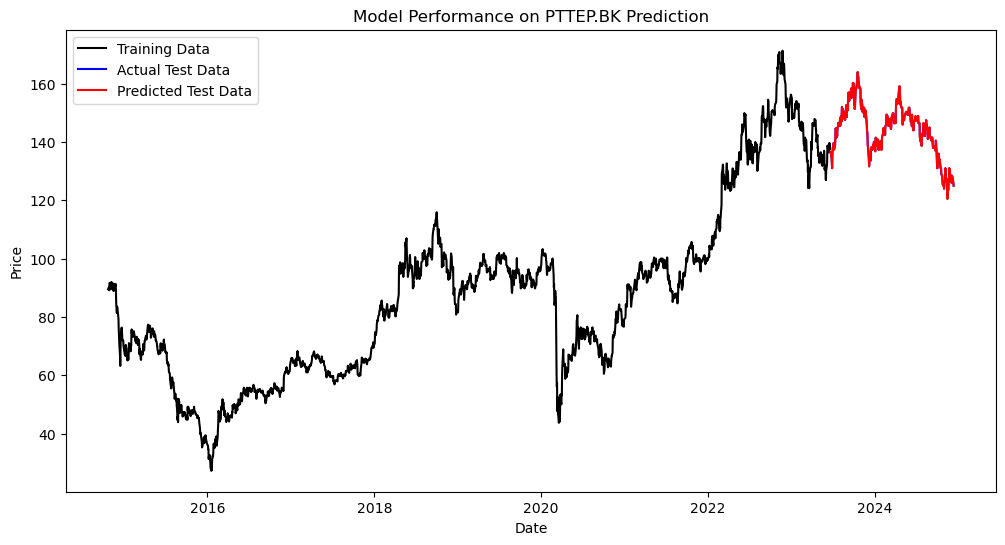

Training set shape for SCC.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for SCC.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for SCC.BK: {'alpha': 0.01}
Performance for SCC.BK - RMSE: 5.052851472865118e-05


<Figure size 640x480 with 0 Axes>

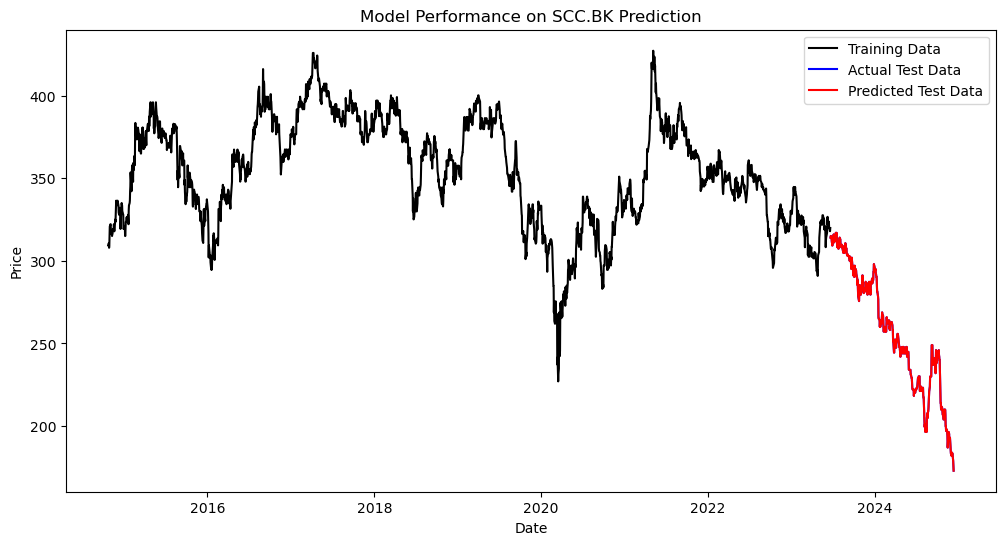

Training set shape for TRUE.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for TRUE.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for TRUE.BK: {'alpha': 0.01}
Performance for TRUE.BK - RMSE: 0.0007733299200926228


<Figure size 640x480 with 0 Axes>

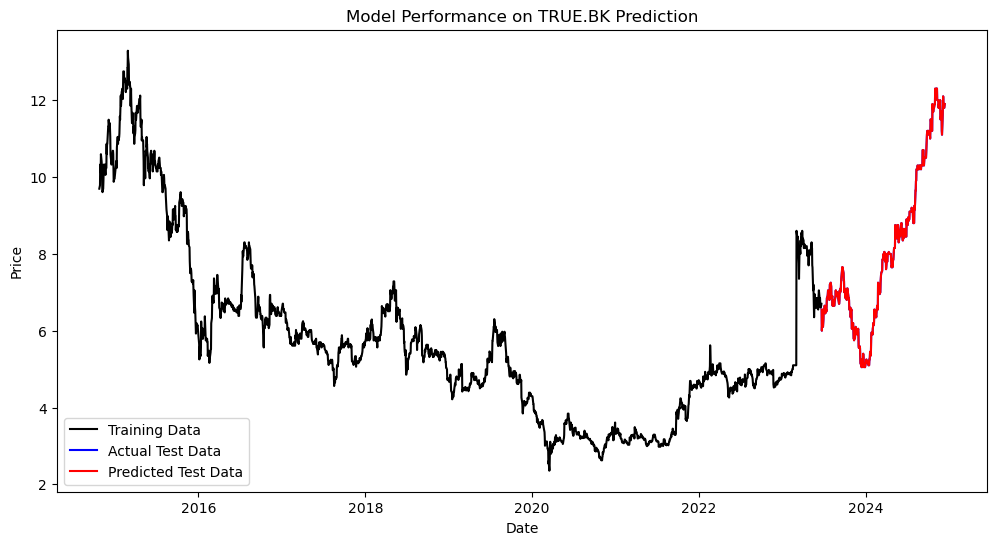

Training set shape for TTB.BK: X_train: (2103, 213), y_train: (2103,)
Testing set shape for TTB.BK: X_test: (360, 213), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for TTB.BK: {'alpha': 0.01}
Performance for TTB.BK - RMSE: 0.002333944814683464


<Figure size 640x480 with 0 Axes>

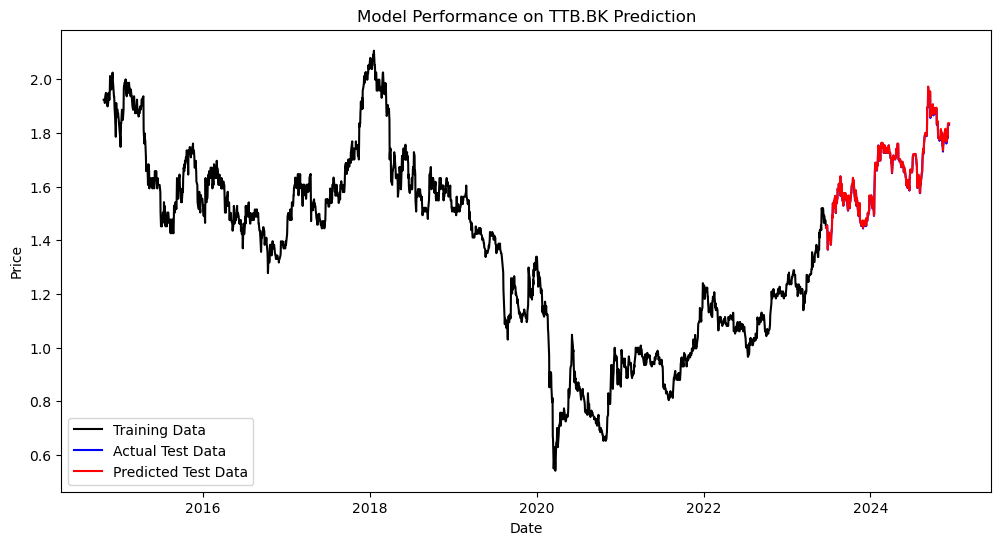


Summary of Results:
ADVANC.BK: RMSE = 0.00
AOT.BK: RMSE = 0.00
BBL.BK: RMSE = 0.00
BDMS.BK: RMSE = 0.00
BH.BK: RMSE = 0.00
CPALL.BK: RMSE = 0.00
CPF.BK: RMSE = 0.00
CPN.BK: RMSE = 0.00
DELTA.BK: RMSE = 0.00
INTUCH.BK: RMSE = 0.00
IVL.BK: RMSE = 0.00
KBANK.BK: RMSE = 0.00
KTB.BK: RMSE = 0.00
MINT.BK: RMSE = 0.00
PTT.BK: RMSE = 0.00
PTTEP.BK: RMSE = 0.00
SCC.BK: RMSE = 0.00
TRUE.BK: RMSE = 0.00
TTB.BK: RMSE = 0.00


<Figure size 640x480 with 0 Axes>

In [12]:
# Initialize dictionaries to store results
results = {}

# Define the hyperparameter grid for GridSearchCV (alpha for regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Fixed test size for the last 360 rows
test_size = 360

# Time Series Split for cross-validation (preserves order)
tscv = TimeSeriesSplit(n_splits=3)

# Loop through each stock in the set1 DataFrame
for stock in set1.columns:
    
    # Prepare the target (stock price) for each stock
    y_stock = set1[stock]  # Stock price for this particular stock
    
    # Define training and testing sets
    X_train = features_df.iloc[:-test_size, :]
    X_test = features_df.iloc[-test_size:, :]
    y_train = y_stock.iloc[:-test_size]
    y_test = y_stock.iloc[-test_size:]
    
    # Print dataset shapes
    print(f"Training set shape for {stock}: X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Testing set shape for {stock}: X_test: {X_test.shape}, y_test: {y_test.shape}")
    
    # Initialize Ridge Regression model
    ridge_reg = Ridge()

    # Perform Grid Search with TimeSeriesSplit cross-validation
    grid_search = GridSearchCV(estimator=ridge_reg, 
                               param_grid=param_grid, 
                               cv=tscv, 
                               scoring='neg_mean_squared_error', 
                               verbose=1)
    
    # Fit the GridSearchCV model to the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters from the grid search
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {stock}: {best_params}")
    
    # Use the best estimator found by GridSearchCV to make predictions
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f'Performance for {stock} - RMSE: {rmse}')
    
    # Store the results (model, predictions, evaluation metrics)
    results[stock] = {
        'model': best_model, 
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse
    }
    
    # Combine training and testing actual prices for visualization
    plt.figure(figsize=(12, 6))
    
    # Plot training data (black)
    plt.plot(y_stock.index[:-test_size], y_stock.values[:-test_size], color='black', label='Training Data')
    
    # Plot actual test data (blue)
    plt.plot(y_stock.index[-test_size:], y_stock.values[-test_size:], color='blue', label='Actual Test Data')
    
    # Overlay the predicted prices for the test set (red)
    plt.plot(y_test.index, y_pred, color='red', label='Predicted Test Data')
    
    # Add title and labels
    plt.title(f'Model Performance on {stock} Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Display the plot
    plt.show()

    # Save the plot
    plt.savefig(f'../images/{stock}_ridge_prediction.png', format='png')

# Final summary of results
print("\nSummary of Results:")
for stock, metrics in results.items():
    print(f"{stock}: RMSE = {metrics['rmse']:.2f}")